# 長庚大學 資工系/人工智慧學程  樣形識別/深度學習 課程使用之教材及示範程式 Ch02

In [503]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [504]:
(xr,yr), (xt,yt)= keras.datasets.mnist.load_data()

In [505]:
xr.shape, yr.shape, xt.shape, yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [506]:
x= xr[0]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

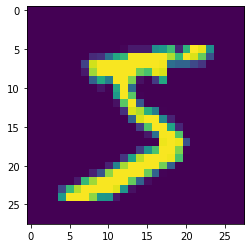

In [507]:
import matplotlib.pyplot as pl
pl.imshow(x)

In [508]:
y= yr[0]
print(f'{y= }')

y= 5


# 想想看，你能做那些改進來提升正確率 (accuracy) ？


1. 修改模型層數、參數量 1 layer with 300 units
   
   (28*28的手寫數字圖像相當小，且分類問題簡單，不需要太多層)

2. 使用adam optimizer
   
   (adam會自動調整learning rate，並保留學習方向的動量，達到更好的學習成效)

3. 增加batchs -> 200
   
   (batchs為一次送入GPU的數量，原則上GPU Memory足夠則越大越好)

4. 增加epochs -> 15

   (經過測試，epochs=10尚未完全收斂，增加訓練次數達到更好成效)

5. 輸入標準化!! 這個影響很重
   
   (原始輸入數據為0-255，將數據標準化到0-1，使模型更容易計算)
   

In [509]:
xr1= xr.reshape(-1, 28*28) 
xt1= xt.reshape(-1, 28*28) 

In [510]:
xr1 = xr1 / 255
xt1 = xt1 / 255

In [511]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(300, activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

aModel.compile(
    optimizer = 'adam',
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 15, 
           batch_size= 200)

aModel.evaluate(xt1, yt)

Epoch 1/15
300/300 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.9088
Epoch 2/15
300/300 [==============================] - 0s 1ms/step - loss: 0.1463 - accuracy: 0.9585
Epoch 3/15
300/300 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 0.9714
Epoch 4/15
300/300 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9787
Epoch 5/15
300/300 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9833
Epoch 6/15
300/300 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9869
Epoch 7/15
300/300 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9897
Epoch 8/15
300/300 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9921
Epoch 9/15
300/300 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9938
Epoch 10/15
300/300 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9953

[0.06678841263055801, 0.9807000160217285]

In [512]:
aModel.summary()

keras.utils.plot_model(aModel, 
    show_shapes= True, 
    show_layer_activations= True)

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_149 (Dense)           (None, 300)               235500    
                                                                 
 dense_150 (Dense)           (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 結論
train acc = 0.9987

test_acc = 0.9807